In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import os
os.chdir('/content/drive/MyDrive')
!pwd

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/facebookresearch/inversecooking.git

Cloning into 'inversecooking'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 56 (delta 11), reused 8 (delta 8), pack-reused 31
Unpacking objects: 100% (56/56), done.


In [ ]:
path_to_dataset = "/content/drive/MyDrive/inversecooking/dataset_path"
src_path = "/content/drive/MyDrive/inversecooking/src"
data_path = "/content/drive/MyDrive/inversecooking/data"
root_path = "/content/drive/MyDrive/inversecooking/"

In [ ]:
import os
os.chdir('/content/drive/MyDrive/inversecooking/dataset_path')
!wget http://data.csail.mit.edu/im2recipe/det_ingrs.json

--2022-04-16 04:58:34--  http://data.csail.mit.edu/im2recipe/det_ingrs.json
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 361085654 (344M) [application/json]
Saving to: ‘det_ingrs.json’

det_ingrs.json      100%[===================>] 344.36M  34.1MB/s    in 14s     

2022-04-16 04:58:49 (25.2 MB/s) - ‘det_ingrs.json’ saved [361085654/361085654]



In [ ]:
!wget http://data.csail.mit.edu/im2recipe/recipe1M_layers.tar.gz

--2022-04-16 05:00:18--  http://data.csail.mit.edu/im2recipe/recipe1M_layers.tar.gz
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399115593 (381M) [application/octet-stream]
Saving to: ‘recipe1M_layers.tar.gz’

recipe1M_layers.tar 100%[===================>] 380.63M  23.9MB/s    in 16s     

2022-04-16 05:00:36 (23.1 MB/s) - ‘recipe1M_layers.tar.gz’ saved [399115593/399115593]



In [ ]:
!tar -xvzf recipe1M_layers.tar.gz

layer1.json
layer2.json


In [ ]:
!pwd

/content/drive/MyDrive/inversecooking/dataset_path


In [ ]:
os.chdir(src_path)
!pwd

/content/drive/MyDrive/inversecooking/src


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### The modified layers is in place - dataset_path dir 

In [ ]:
os.chdir(src_path)
!python build_vocab.py --recipe1m_path /content/drive/MyDrive/inversecooking/dataset_path

Loading data...
Loaded data.
Found 50000 recipes in the dataset.
50000it [00:56, 889.65it/s]
Total ingr vocabulary size: 563
Total token vocabulary size: 5288
50000it [00:56, 881.64it/s]
Dataset size:
train : 31261
val : 6858
test : 6562


In [ ]:
import pickle
class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word, idx=None):
        if idx is None:
            if not word in self.word2idx:
                self.word2idx[word] = self.idx
                self.idx2word[self.idx] = word
                self.idx += 1
            return self.idx
        else:
            if not word in self.word2idx:
                self.word2idx[word] = idx
                if idx in self.idx2word.keys():
                    self.idx2word[idx].append(word)
                else:
                    self.idx2word[idx] = [word]

                return idx

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<pad>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.idx2word)
x1 = pickle.load(open("/content/drive/MyDrive/inversecooking/data/recipe1m_vocab_ingrs.pkl", "rb"))

In [ ]:
x1.word2idx

In [ ]:
!pip install ratarmount

     |████████████████████████████████| 68 kB 4.1 MB/s 
     |████████████████████████████████| 674 kB 30.2 MB/s 
     |████████████████████████████████| 3.2 MB 96.1 MB/s 
     |████████████████████████████████| 1.4 MB 86.4 MB/s 
  Created wheel for fusepy: filename=fusepy-3.0.1-py3-none-any.whl size=10503 sha256=39f18e146c7f8531f3ff857e2f229f60f221009b04545b88674b7c590a631f97
  Stored in directory: /root/.cache/pip/wheels/89/07/84/a5ebfafeefbbc56ceda9d6935a54a8be7a4eccf4ea7e9bf980
Successfully built fusepy


In [ ]:
!conda install pytorch=0.4.1 cuda90 -c pytorch

/bin/bash: conda: command not found


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2022-04-17 12:06:43--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-04-17 12:06:43--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.2’

     0K .......... .......... .......... .......... ..........  0% 12.8M 4s
    50K .......... .......... .......... .......... ..........  

In [ ]:
!which conda

/usr/local/bin/conda


In [ ]:
!conda --version

conda 4.5.4


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tk-8.6.11                  |       h1ccaba5_0         3.2 MB
    tqdm-4.63.0                |     pyhd3eb1b0_0          80 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    pyopenssl-22.0.0           |     pyhd3eb1b0_0          49 KB
    pycosat-0.6.3              |   py36h27cfd23_0         107 KB
    pysocks-1.7.1              |   py36h06a4308_0          30 KB
    charset-normalizer-2.0.4   |     pyhd3eb1b0_0          33 KB
    libstdcxx-ng-9.1.0         |       hdf63c60_0         4.0 MB
    pip-21.2.2                 |   py36h06a4308_0         2.1 MB
    brotlipy-0.7.0             |py36h27cfd23_1003         349 KB
    urllib3-1.26.8             |     pyhd3eb1b0_0   

tk-8.6.11            |  3.2 MB | ########## | 100% 
tqdm-4.63.0          |   80 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
pyopenssl-22.0.0     |   49 KB | ########## | 100% 
pycosat-0.6.3        |  107 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
charset-normalizer-2 |   33 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
pip-21.2.2           |  2.1 MB | ########## | 100% 
brotlipy-0.7.0       |  349 KB | ########## | 100% 
urllib3-1.26.8       |  100 KB | ########## | 100% 
ca-certificates-2022 |  124 KB | ########## | 100% 
openssl-1.1.1n       |  3.8 MB | ########## | 100% 
conda-package-handli |  946 KB | ########## | 100% 
ncurses-6.3          |  1.0 MB | ########## | 100% 
six-1.16.0           |   19 KB | ########## | 100% 
pycparser-2.21       |   94 KB | ########## | 100% 
idna-3.3             |   55 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
certifi-2021

In [ ]:
!conda update -n base -c defaults conda

Solving environment: \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [ ]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))

In [ ]:
!conda install pytorch=0.4.1 cuda90 -c pytorch

Solving environment: / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cuda90
    - pytorch=0.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    cuda90-1.0                 |       h6433d27_0           3 KB  pytorch
    intel-openmp-2022.0.1      |    h06a4308_3633         4.2 MB
    libgfortran-ng-7.5.0       |      ha8ba4b0_17          22 KB
    libgfortran4-7.5.0         |      ha8ba4b0_17         995 KB
    libopenblas-0.3.18         |       hf726d26_0         4.9 MB
    mkl-2022.0.1               |     h06a4308_117       127.7 MB
    ninja-1.10.2               |       h5e70eb0_2 

In [ ]:
!wget https://dl.fbaipublicfiles.com/inversecooking/ingr_vocab.pkl
!wget https://dl.fbaipublicfiles.com/inversecooking/instr_vocab.pkl

--2022-04-15 21:42:24--  https://dl.fbaipublicfiles.com/inversecooking/ingr_vocab.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30658 (30K) [application/octet-stream]
Saving to: ‘ingr_vocab.pkl’

ingr_vocab.pkl      100%[===================>]  29.94K   160KB/s    in 0.2s    

2022-04-15 21:42:25 (160 KB/s) - ‘ingr_vocab.pkl’ saved [30658/30658]

--2022-04-15 21:42:25--  https://dl.fbaipublicfiles.com/inversecooking/instr_vocab.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464869 (454K) [application/octet-stream]
Saving to: ‘instr_vocab.pkl’

instr_vocab.pkl     100%[===

In [ ]:
os.chdir(root_path)
!pip install -r requirements.txt

     |████████████████████████████████| 14.8 MB 14.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 11.5 MB 101.9 MB/s 
     |██████████████████████████████▎ | 834.1 MB 132.2 MB/s eta 0:00:01tcmalloc: large alloc 1147494400 bytes == 0x560dfdf12000 @  0x7fc724cc6615 0x560dc57f6455 0x560dc5749e84 0x560dc57554aa 0x560dc5842f14 0x560dc586039f 0x560dc57f0160 0x560dc582d41b 0x560dc58430f7 0x560dc586039f 0x560dc57f0160 0x560dc582d41b 0x560dc58430f7 0x560dc5861a1e 0x560dc5801610 0x560dc5860972 0x560dc5801610 0x560dc5860972 0x560dc5801610 0x560dc5860972 0x560dc5833044 0x560dc57f29fe 0x560dc583990c 0x560dc57f128c 0x560dc5843135 0x560dc586039f 0x560dc57f0160 0x560dc582d41b 0x560dc58430f7 0x560dc5861a1e 0x560dc57f0160
     |████████████████████████████████| 881.9 MB 10 kB/s 
     |████████████████████████████████| 23.3 MB 101.2 MB/s 
     |████████████████████████████████| 1.5 MB 91.9 MB/s 
     |████████████████████████████████| 3.1 MB 71.7

In [ ]:
import sys
import os
sys.path.insert(1,'inversecooking/')
sys.path.insert(1,'inversecooking/src/')
os.chdir('/content/drive/MyDrive/inversecooking/src/')

In [ ]:
!pip install ratarmount


     |████████████████████████████████| 68 kB 5.5 MB/s 
     |████████████████████████████████| 1.4 MB 55.7 MB/s 
     |████████████████████████████████| 3.2 MB 53.8 MB/s 
     |████████████████████████████████| 674 kB 47.2 MB/s 
  Created wheel for fusepy: filename=fusepy-3.0.1-py3-none-any.whl size=10503 sha256=e6f2fe354f59b36023f48ebc737e86480fa16b269bba3cc205c3ae55748c6da5
  Stored in directory: /root/.cache/pip/wheels/89/07/84/a5ebfafeefbbc56ceda9d6935a54a8be7a4eccf4ea7e9bf980
Successfully built fusepy


In [ ]:
os.chdir('/content/drive/MyDrive/')
!ratarmount recipe1M_images_train.tar /content/drive/MyDrive/inversecooking/dataset_path/images/train_data/ -o nonempty

Creating offset dictionary for /content/drive/MyDrive/recipe1M_images_train.tar ...
Creating new SQLite index database at /content/drive/MyDrive/recipe1M_images_train.tar.index.sqlite
Position 514921984 of 100507801600 (0.51%). Remaining time: 6 min 28 s (current rate), 6 min 28 s (average rate). Spent time: 0 min 2 s
Position 679367680 of 100507801600 (0.68%). Remaining time: 21 min 20 s (current rate), 10 min 4 s (average rate). Spent time: 0 min 4 s
Position 801674752 of 100507801600 (0.80%). Remaining time: 29 min 35 s (current rate), 13 min 2 s (average rate). Spent time: 0 min 6 s
Position 933611008 of 100507801600 (0.93%). Remaining time: 26 min 23 s (current rate), 14 min 54 s (average rate). Spent time: 0 min 8 s
Position 1069815296 of 100507801600 (1.06%). Remaining time: 25 min 45 s (current rate), 16 min 16 s (average rate). Spent time: 0 min 10 s
Position 1175501312 of 100507801600 (1.17%). Remaining time: 35 min 32 s (current rate), 17 min 59 s (average rate). Spent time:

In [ ]:
#LMDB generation
os.chdir(src_path)
!python utils/ims2file.py --root /content/drive/MyDrive/inversecooking/dataset_path

31261it [45:14, 11.52it/s]
6858it [05:33, 20.53it/s]
6562it [28:13,  3.88it/s]
(256, 256, 3)


In [ ]:
!python train.py --model_name im2ingr --batch_size 100 --finetune_after 0 --ingrs_only \
--es_metric iou_sample --loss_weight 0 1000.0 1.0 1.0 \
--learning_rate 1e-4 --num_epochs 25 --scale_learning_rate_cnn 1.0 \
--save_dir ../checkpoints --recipe1m_dir /content/drive/MyDrive/inversecooking/dataset_path --aux_data_dir /content/drive/MyDrive/inversecooking/data

Training logs will be saved to: ../checkpoints/inversecooking/im2ingr/logs/train.log
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking

In [ ]:
!conda install -c conda-forge keras

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    keras-2.8.0                |     pyhd8ed1ab_0         879 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1018 KB

The following NEW packages will be INSTALLED:

  keras              conda-forge/noarch::keras-2.8.0-pyhd8ed1ab_0

Th

In [ ]:
!conda install -c conda-forge tensorboard

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - tensorboard


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-1.0.0              |     pyhd8ed1ab_0          95 KB  conda-forge
    c-ares-1.18.1              |       h7f8727e_0         114 KB
    coverage-4.0.3             |           py36_1         211 KB  conda-forge
    grpcio-1.35.0              |   py36hce63b2e_0         1.8 MB
    importlib-metadata-4.8.1   |   py36h06a4308_0          38 KB
    libblas-3.9.0              |11_linux64_openblas          12 KB  conda-

In [ ]:
!pip install -U protobuf

In [ ]:
import os
os.chdir(src_path)
!python train.py --model_name model --batch_size 64 --recipe_only --transfer_from im2ingr \
--save_dir ../checkpoints --recipe1m_dir /content/drive/MyDrive/inversecooking/dataset_path --notensorboard --num_epochs 20

Streaming output truncated to the last 5000 lines.
[W Indexing.cu:963] Warning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (function masked_fill__cuda)
[W Indexing.cu:963] Warning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (function masked_fill__cuda)
[W Indexing.cu:963] Warning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (function masked_fill__cuda)
[W Indexing.cu:963] Warning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (function masked_fill__cuda)
[W Indexing.cu:963] Warning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (function masked_f

##Testing phase

In [ ]:
import os
os.chdir(src_path)
!python sample.py --model_name model --save_dir ../checkpoints --recipe1m_dir path_to_dataset --greedy --eval_split test

Eval logs will be saved to: ../checkpoints/inversecooking/model/logs/eval.log


In [ ]:
import pickle
recipes = pickle.load(open("/content/drive/MyDrive/inversecooking/checkpoints/inversecooking/model/checkpoints/test_greedy_gencaps.pkl", 'rb'))

In [ ]:
recipes

{'ingr_iou': {'00003a70b1': 0.3999999761581421,
  '00047059be': 0.1538461446762085,
  '00059477e2': 0.3333333134651184,
  '0007a28fe7': 0.23076921701431274,
  '000a3d10fb': 0.3333333134651184,
  '000bba053c': 0.3333333134651184,
  '000d5e4996': 0.07692307233810425,
  '000d94f80b': 0.1666666567325592,
  '00100336d5': 0.2666666507720947,
  '001243534a': 0.2142857015132904,
  '0012733d1d': 0.4166666269302368,
  '0012806b36': 0.5999999642372131,
  '0013592bfb': 0.06666666269302368,
  '001528065f': 0.4285714030265808,
  '0015f3dbc0': 0.19999998807907104,
  '0017c79fb6': 0.4999999701976776,
  '00183acce9': 0.2142857015132904,
  '0018949bd3': 0.23076921701431274,
  '001ac13db4': 0.1249999850988388,
  '001ee1021c': 0.4999999403953552,
  '001fc91fde': 0.0,
  '00202f23e5': 0.1111110970377922,
  '002152a50f': 0.2857142686843872,
  '0022b163f8': 0.23076921701431274,
  '00234a6bd1': 0.0,
  '0024f517bc': 0.4285713732242584,
  '0025ca4eef': 0.27272725105285645,
  '0027c75380': 0.2222221940755844,
  '

In [ ]:
#all
import os
os.chdir(src_path)
!python sample.py --model_name model --save_dir ../checkpoints --recipe1m_dir /content/drive/MyDrive/inversecooking/dataset_path  --greedy --eval_split test

Eval logs will be saved to: ../checkpoints/inversecooking/model/logs/eval.log


Namespace(aux_data_dir='../data', batch_size=128, beam=-1, crop_size=224, current_epoch=19, decay_lr=True, dropout_decoder_i=0.3, dropout_decoder_r=0.3, dropout_encoder=0.3, embed_size=512, es_metric='loss', eval_split='test', finetune_after=-1, get_perplexity=False, greedy=True, image_model='resnet50', image_size=256, ingrs_only=False, label_smoothing_ingr=0.1, learning_rate=0.001, log_step=10, log_term=False, loss_weight=[1.0, 0.0, 0.0, 0.0], lr_decay_every=1, lr_decay_rate=0.99, max_eval=4096, maxnumims=5, maxnuminstrs=10, maxnumlabels=20, maxseqlen=15, model_name='model', n_att=8, n_att_ingrs=4, num_epochs=20, num_workers=8, numgens=3, patience=50, project_name='inversecooking', recipe1m_dir='/content/drive/MyDrive/inversecooking/dataset_path', recipe_only=False, resume=False, save_dir='../checkpoints', scale_learning_rate_cnn=0.01, suff='', temperature=1.0, tensorboard=False, transf_layers=16, transf_layers_ingrs=4, transfer_from='im2ingr', use_lmdb=True, use_true_ingrs=False, weight_decay=0.0)

##accuracy 0.9843987
##f1 0.3851059229943335
##jaccard 0.23847132052740702
##f1_ingredients 0.02409965
##precision_all 0.4354947136833072
##recall_all 0.3451683216275111
##../checkpoints/inversecooking/model/checkpoints/test_greedy_gencaps.pkl
##Number of samples with excessive repetitions: 152

In [ ]:
#recipe_only
import os
os.chdir(src_path)
!python sample.py --model_name model --save_dir ../checkpoints --recipe1m_dir /content/drive/MyDrive/inversecooking/dataset_path  --greedy --eval_split test

Eval logs will be saved to: ../checkpoints/inversecooking/model/logs/eval.log


## Subsampling data

```
# This is formatted as code
```



In [ ]:
!pwd

/content/drive/MyDrive/inversecooking/src


In [ ]:
os.chdir("/content/drive/MyDrive/inversecooking/dataset_path")

In [ ]:
import json
def load_json(fi):
  f = open(fi)
  data = json.load(f)
  return data

In [ ]:
layer1_file = load_json("layer1.json")
layer1_dump = layer1_file[0:50000]

In [ ]:
with open("layer1_new_1.json", "w") as f:
  json.dump(layer1_dump,f)

In [ ]:
data_layer_1 = load_json("layer1_new.json")
data_layer_2 = load_json("layer2.json")

In [ ]:
data_layer_1[0]

{'id': '000018c8a5',
 'ingredients': [{'text': '6 ounces penne'},
  {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
  {'text': '1 ounce Cheddar, grated (1/4 cup)'},
  {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
  {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
  {'text': '1/4 cup (1/2 stick) unsalted butter'},
  {'text': '1/3 cup all-purpose flour'},
  {'text': '3 cups milk'},
  {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
  {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
  {'text': '1/2 teaspoon kosher salt'},
  {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
  {'text': '1/8 teaspoon garlic powder'},
  {'text': '(makes about 4 cups)'}],
 'instructions': [{'text': 'Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.'},
  {'text': 'Cook the penne 2 minutes less than package directions.'},
  {'text': '(It will finish cooking in the oven.)'},
  {'text': 'Rinse the pasta in c

In [ ]:
layer1_ids = [(layer1["id"], layer1["partition"]) for layer1 in data_layer_1]

In [ ]:
layer1_ids

In [ ]:
finaldict = {}
for entry in data_layer_2:
  id = entry["id"]
  finaldict[id] = entry

In [ ]:
layer2_dict = finaldict
layer2_dict

In [ ]:
final_layer2_list = []
layer2_ids = layer2_dict.keys()
for (id,part) in layer1_ids:
  if id in layer2_ids:
    entry = layer2_dict[id]
    entry['partition'] = part
    final_layer2_list.append(entry)
len(final_layer2_list)

19606

In [ ]:
final_layer2_list[121]

{'id': '001537b578',
 'images': [{'id': '9921d6a2fb.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/49/53/34/pic1zdCrk.jpg'},
  {'id': 'db1be6187d.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/49/53/34/picTTj0GO.jpg'}],
 'partition': 'train'}

In [ ]:
!pwd

/content/drive/MyDrive/inversecooking/dataset_path


In [ ]:
import tqdm
final_updated_list = []
root_path = "images"
doesnotexist = 0
import sys
for entry in final_layer2_list:
  new_entry = {}
  new_entry['id'] = entry['id']
  imglist = entry['images']
  part = entry['partition']
  new_img_list = []
  for img in imglist:
    image_id = img['id']
    path = os.path.join(root_path, part, image_id[0], image_id[1], image_id[2], image_id[3], image_id)
    #print (path)
    #path_x = os.path.join(subsampled_dir, root_path, part, image_id[0], image_id[1], image_id[2], image_id[3])
    if os.path.exists(path):
      #print (img)
      new_img_list.append(img)
    else:
      doesnotexist += 1
  new_entry['images'] = new_img_list
  final_updated_list.append(new_entry)
  print (f"{len(final_updated_list)}")
  '''
  if len(final_updated_list) > 0:
    print (final_updated_list)
    sys.exit()
  '''

In [ ]:
final_updated_list[0:10]

[{'id': '00003a70b1',
  'images': [{'id': '3e233001e2.jpg',
    'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picaYYmb9.jpg'},
   {'id': '7f749987f9.jpg',
    'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picpy37SW.jpg'},
   {'id': 'aaf6b2dcd3.jpg',
    'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picX9CNE2.jpg'}]},
 {'id': '000075604a',
  'images': [{'id': '6bdca6e490.jpg',
    'url': 'https://img-global.cpcdn.com/001_recipes/5806945844854784/0x0/photo.jpg'}]},
 {'id': '00007bfd16',
  'images': [{'id': '6409eab844.jpg',
    'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/40/86/94/picNQPjbC.jpg'},
   {'id': 'f7cb3de295.jpg',
    'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/40/86/94/picjXIJ

In [ ]:
import json
with open("layer2_new.json","w") as f:
  json.dump(final_updated_list, f)

In [ ]:
doesnotexist

3453

In [ ]:
data_layer = load_json("layer2_new.json")

In [ ]:
data_layer[0]

{'id': '00003a70b1',
 'images': [{'id': '3e233001e2.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picaYYmb9.jpg'},
  {'id': '7f749987f9.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picpy37SW.jpg'},
  {'id': 'aaf6b2dcd3.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picX9CNE2.jpg'}]}

In [ ]:
import sys
layer2_entries = []
layer2_keys = layer2_dict.keys()
for (id,part) in layer1_ids:
  #print (f"{id},{part}")
  if id in layer2_keys:
    layer2_entry = layer2_dict[id]
    layer2_entry["partition"] = part
    #print (layer2_entry)
    layer2_entries.append(layer2_entry)
len(layer2_entries)

19606

In [ ]:
layer2_entries[0]

{'id': '00003a70b1',
 'images': [{'id': '3e233001e2.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picaYYmb9.jpg'},
  {'id': '7f749987f9.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picpy37SW.jpg'},
  {'id': 'aaf6b2dcd3.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picX9CNE2.jpg'}],
 'partition': 'test'}

In [ ]:
c = 0
final_images = []
for ele in layer2_entries:
  part = ele["partition"]
  imglist = ele["images"]
  for image in imglist:
    final_images.append((part, image["id"]))
  c += len(imglist)
  

In [ ]:
final_images[0]

('test', '3e233001e2.jpg')

In [ ]:
os.chdir(path_to_dataset)

In [ ]:
import os
path_count = {"train":0,"test":0,"val":0}
final_image_count = 0
final_images_list = []
root_path = "images"
subsampled_dir = "subsample"
for entry in final_images:
  part = entry[0]
  image_id = entry[1]
  if part == "train":
    root_path = "images/train_data"
  else:
    root_path = "images"
  path = os.path.join(root_path, part, image_id[0], image_id[1], image_id[2], image_id[3], image_id)
  path_x = os.path.join(subsampled_dir, root_path, part, image_id[0], image_id[1], image_id[2], image_id[3])
  #print (path)
  if os.path.exists(path):
    final_image_count += 1
    path_y = f"{path_x}/{image_id}"
    #print (path_y)
    final_images_list.append(path_y)
    os.system(f"mkdir -p {path_x}")
    os.system(f"cp {path} {path_y}")
    path_count[part] += 1
    print (path_count)

Streaming output truncated to the last 5000 lines.
{'train': 26173, 'test': 4885, 'val': 2273}
{'train': 26174, 'test': 4885, 'val': 2273}
{'train': 26175, 'test': 4885, 'val': 2273}
{'train': 26176, 'test': 4885, 'val': 2273}
{'train': 26177, 'test': 4885, 'val': 2273}
{'train': 26178, 'test': 4885, 'val': 2273}
{'train': 26179, 'test': 4885, 'val': 2273}
{'train': 26180, 'test': 4885, 'val': 2273}
{'train': 26181, 'test': 4885, 'val': 2273}
{'train': 26181, 'test': 4886, 'val': 2273}
{'train': 26182, 'test': 4886, 'val': 2273}
{'train': 26182, 'test': 4886, 'val': 2274}
{'train': 26183, 'test': 4886, 'val': 2274}
{'train': 26183, 'test': 4886, 'val': 2275}
{'train': 26183, 'test': 4887, 'val': 2275}
{'train': 26183, 'test': 4887, 'val': 2276}
{'train': 26183, 'test': 4887, 'val': 2277}
{'train': 26184, 'test': 4887, 'val': 2277}
{'train': 26185, 'test': 4887, 'val': 2277}
{'train': 26186, 'test': 4887, 'val': 2277}
{'train': 26187, 'test': 4887, 'val': 2277}
{'train': 26188, 'test': 

In [ ]:
import os
os.chdir("/content/drive/MyDrive/inversecooking/dataset_path/")

In [ ]:
import os
path_count = {"train":0,"test":0,"val":0}
final_image_count = 0
final_images_list = []
root_path = "images"
subsampled_dir = "subsample"
for entry in final_images:
  part = entry[0]
  image_id = entry[1]
  path = os.path.join(root_path, part, image_id[0], image_id[1], image_id[2], image_id[3], image_id)
  path_x = os.path.join(subsampled_dir, root_path, part, image_id[0], image_id[1], image_id[2], image_id[3])
  #print (path)
  if os.path.exists(path):
    final_image_count += 1
    path_y = f"{path_x}/{image_id}"
    #print (path_y)
    final_images_list.append(path_y)
    #os.system(f"mkdir -p {path_x}")
    #os.system(f"cp {path} {path_y}")
    path_count[part] += 1
    print (path_count)

In [ ]:
import sys
layer2_entries = []
layer2_keys = layer2_dict.keys()
for (id,part) in layer1_ids:
  #print (f"{id},{part}")
  if id in layer2_keys:
    layer2_entry = layer2_dict[id]
    layer2_entry["partition"] = part
    #print (layer2_entry)
    layer2_entries.append(layer2_entry)
len(layer2_entries)

In [ ]:
data_layer_1_after = load_json("layer1_new.json")
data_layer_2_after = load_json("layer2_new.json")

In [ ]:
for ele in data_layer_1_after:
  if ele['id'] == "00007bfd16":
    print (ele)

{'ingredients': [{'text': '6 -8 cups fresh rhubarb, or'}, {'text': '6 -8 cups frozen rhubarb, thawed'}, {'text': '1 12 cups granulated sugar'}, {'text': '6 ounces strawberry Jell-O gelatin dessert'}, {'text': '1 white cake mix (2 layer size)'}, {'text': '1 12 cups water'}, {'text': '12 cup butter or 12 cup margarine, melted'}], 'url': 'http://www.food.com/recipe/strawberry-rhubarb-dump-cake-408694', 'partition': 'train', 'title': 'Strawberry Rhubarb Dump Cake', 'id': '00007bfd16', 'instructions': [{'text': 'Put ingredients in a buttered 9 x 12 x 2-inch pan in even layers in the order that they are given - DO NOT MIX.'}, {'text': 'Bake in a 350 oven for 1 hour.'}]}


In [ ]:
data_layer_2_after[2]

{'id': '00007bfd16',
 'images': [{'id': '6409eab844.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/40/86/94/picNQPjbC.jpg'},
  {'id': 'f7cb3de295.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/40/86/94/picjXIJN8.jpg'}]}

In [ ]:
os.chdir(src_path)

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import os
from args import get_parser
import pickle
from model import get_model
from torchvision import transforms
from utils.output_utils import prepare_output
from PIL import Image
import time

In [ ]:
data_dir = '../data'

In [ ]:
# code will run in gpu if available and if the flag is set to True, else it will run on cpu
use_gpu = True
device = torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
map_loc = None if torch.cuda.is_available() and use_gpu else 'cpu'

In [ ]:
import os
os.path

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>

In [ ]:
class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word, idx=None):
        if idx is None:
            if not word in self.word2idx:
                self.word2idx[word] = self.idx
                self.idx2word[self.idx] = word
                self.idx += 1
            return self.idx
        else:
            if not word in self.word2idx:
                self.word2idx[word] = idx
                if idx in self.idx2word.keys():
                    self.idx2word[idx].append(word)
                else:
                    self.idx2word[idx] = [word]

                return idx

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<pad>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.idx2word)

In [ ]:
# code below was used to save vocab files so that they can be loaded without Vocabulary class
#ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_ingrs.pkl'), 'rb'))
#ingrs_vocab = [min(w, key=len) if not isinstance(w, str) else w for w in ingrs_vocab.idx2word.values()]
#vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_toks.pkl'), 'rb')).idx2word
#pickle.dump(ingrs_vocab, open('../demo/ingr_vocab.pkl', 'wb'))
#pickle.dump(vocab, open('../demo/instr_vocab.pkl', 'wb'))

ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'recipe1m_vocab_ingrs.pkl'), 'rb'))
ingrs_vocab = [min(w, key=len) if not isinstance(w, str) else w for w in ingrs_vocab.idx2word.values()]

vocab = pickle.load(open(os.path.join(data_dir, 'recipe1m_vocab_toks.pkl'), 'rb')).idx2word
pickle.dump(ingrs_vocab, open('../data/ingr_vocab.pkl', 'wb'))
pickle.dump(vocab, open('../data/instr_vocab.pkl', 'wb'))

ingrs_vocab = pickle.load(open('../data/ingr_vocab.pkl', 'rb'))
vocab = pickle.load(open( '../data/instr_vocab.pkl', 'rb'))

ingr_vocab_size = len(ingrs_vocab)
instrs_vocab_size = len(vocab)
output_dim = instrs_vocab_size

In [ ]:
print (instrs_vocab_size, ingr_vocab_size)

5276 563


In [ ]:
!wget https://dl.fbaipublicfiles.com/inversecooking/modelbest.ckpt

--2022-04-15 22:06:49--  https://dl.fbaipublicfiles.com/inversecooking/modelbest.ckpt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 415464764 (396M) [application/octet-stream]
Saving to: ‘modelbest.ckpt’

modelbest.ckpt      100%[===================>] 396.22M  21.2MB/s    in 20s     

2022-04-15 22:07:10 (19.4 MB/s) - ‘modelbest.ckpt’ saved [415464764/415464764]



In [ ]:
!pwd

/content/drive/MyDrive/inversecooking/src


In [ ]:
import time
t = time.time()
import sys; sys.argv=['']; del sys
args = get_parser()
args.maxseqlen = 15
args.ingrs_only=False
model = get_model(args, ingr_vocab_size, instrs_vocab_size)
# Load the trained model parameters
model_path = '/content/drive/MyDrive/inversecooking/checkpoints/inversecooking/model/checkpoints/modelbest.ckpt'
#model_path = '/content/drive/MyDrive/inversecooking/src/ckpt.pt'
model.load_state_dict(torch.load(model_path, map_location=map_loc))
model.to(device)
model.eval()
model.ingrs_only = False
model.recipe_only = False
print ('loaded model')
print ("Elapsed time:", time.time() -t)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


loaded model
Elapsed time: 1.689074993133545


In [ ]:
transf_list_batch = []
transf_list_batch.append(transforms.ToTensor())
transf_list_batch.append(transforms.Normalize((0.485, 0.456, 0.406), 
                                              (0.229, 0.224, 0.225)))
to_input_transf = transforms.Compose(transf_list_batch)

In [ ]:
greedy = [True, False, False, False]
beam = [-1, -1, -1, -1]
temperature = 1.0
numgens = len(greedy)

In [ ]:
import requests
from io import BytesIO
import random
from collections import Counter
use_urls = False # set to true to load images from demo_urls instead of those in test_imgs folder
show_anyways = False #if True, it will show the recipe even if it's not valid
image_folder = '/content/drive/MyDrive/inversecooking/data/demo_imgs'

if not use_urls:
    demo_imgs = os.listdir(image_folder)
    random.shuffle(demo_imgs)

demo_urls = ['https://food.fnr.sndimg.com/content/dam/images/food/fullset/2013/12/9/0/FNK_Cheesecake_s4x3.jpg.rend.hgtvcom.826.620.suffix/1387411272847.jpeg',
            'https://www.196flavors.com/wp-content/uploads/2014/10/california-roll-3-FP.jpg']

demo_files = demo_urls if use_urls else demo_imgs

## Results from subsampled model

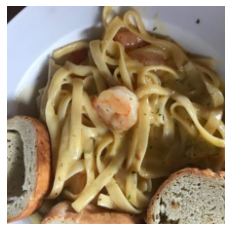

/content/drive/MyDrive/inversecooking/src/modules/multihead_attention.py:128: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/cuda/Indexing.cu:963.)
  float('-inf'),


RECIPE 1

Title: Sauteed gnocchi

Ingredients:
pepper, oil, onion, salt, clove, cheese, butter

Instructions:
-Preheat oven to 350 degrees f (175 degrees c).
-In a large bowl, toss together the olive oil, garlic, salt, pepper, and garlic.
-Toss to coat.
-Arrange the chicken in a single layer on a baking sheet.
-Bake for 20 minutes, or until the juices run clear.
RECIPE 2

Title: Fabulous green onions

Ingredients:
pepper, oil, onion, salt, clove, cheese, butter

Instructions:
-Cook gnocchi as directed on package until tender.
-Drain.
-Heat olive oil in large saute pan or skillet over medium heat.
-Add garlic and saute until onions are translucent, about 5 minutes.
-Add bell pepper; cook 2 minutes.
-Add garlic; cook until thickened.
-Stir in tomato paste, salt, pepper, cayenne pepper, and dill.
-Cook until heated through, about 2 minutes.
-Remove from heat and stir in green onions.
RECIPE 3

Title: Sauteed green onion rings

Ingredients:
pepper, oil, onion, salt, clove, cheese, butter



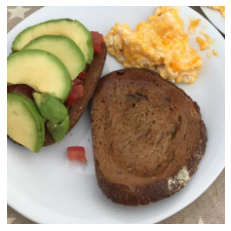

RECIPE 1

Title: Portuguese chickpea salad

Ingredients:
salt, pepper, cheese, egg, onion, oil

Instructions:
-Preheat oven to 350 degrees f (175 degrees c).
-Grease a baking sheet.
-In a large bowl, mix together the eggs, salt, pepper, and olive oil.
-In a separate bowl, mix the eggs, onion, and salt.
-Pour the mixture into the prepared baking dish.
-Bake for 35 to 35 minutes or until the center is golden brown.
RECIPE 2

Title: Cheesy egg and onion omelet

Ingredients:
salt, pepper, cheese, egg, onion, oil

Instructions:
-In a large mixing bowl, combine the egg yolk, egg yolk, salt and pepper and beat until smooth.
-Pour in the oil and mix well, then mix well, then add them to taste.
-Serve immediately.
RECIPE 3

Title: Baked egg drop

Ingredients:
salt, pepper, cheese, egg, onion, oil

Instructions:
-In large bowl, beat together eggs, olive oil, salt, and pepper.
-Add egg and mix well.
-Pour into greased baking pan.
-Bake at 350 degrees for 30-35 minutes.
RECIPE 4

Title: Fried omel

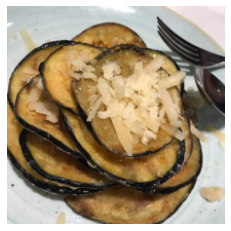

RECIPE 1

Title: Cheesy fajita dip

Ingredients:
pepper, salt, oil, onion, cheese

Instructions:
-In a large skillet, heat oil over medium heat.
-Add onion and saute until translucent, about 5 minutes.
-Add onion, salt, pepper, and saute until onions are translucent, about 5 minutes.
-Add salt and pepper to taste.
RECIPE 2

Title: Spicy fried onion soup

Ingredients:
pepper, salt, oil, onion, cheese

Instructions:
-Heat olive oil in a large skillet over medium-low heat.
-Remove from heat and stir in onion and onion.
-Add salt, pepper, and saute for 2 minutes or until onion is translucent.
-Stir in the onion and pepper.
RECIPE 3

Title: Cheesy fajita omelette - pate

Ingredients:
pepper, salt, oil, onion, cheese

Instructions:
-In a large saucepan, combine the onions, salt, and pepper and bring to a boil.
-Reduce heat, and cook until the cheese is tender, about 15 minutes.
-Transfer the mixture to a slow cooker.
RECIPE 4

Title: Sauteed onion rings

Ingredients:
pepper, salt, oil, onion

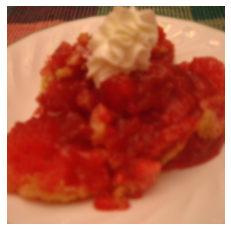

RECIPE 1

Title: Easy chocolate chip cookies

Ingredients:
sugar, salt, egg, flour, water, butter

Instructions:
-Preheat oven to 350 degrees f (175 degrees c).
-Grease a 9-inch baking dish.
-In a large bowl, combine flour, baking soda, salt, and salt.
-In a separate bowl, beat egg whites with a fork until stiff peaks form.
-Add flour, baking soda, and salt.
-Stir in the flour mixture.
-Pour batter into prepared pan.
-Bake for 35 to 25 minutes or until a toothpick inserted in the center comes out clean.
-Cool on wire rack for 10 minutes before removing from pan.
RECIPE 2

Title: Homemade pancake cookies

Ingredients:
sugar, salt, egg, flour, water, butter

Instructions:
-Preheat oven to 425f and line a baking sheet with parchment paper.
-Cut the ends off the ends of each piece, leaving a fork.
-Place the butter and butter on a baking sheet.
-Sprinkle with sugar, salt and pepper.
-Bake for about 30 minutes, until the crust is golden brown.
RECIPE 3

Title: Mother's mother's famous panca

In [ ]:
#Actual pretrained model code
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    transf_list = []
    transf_list.append(transforms.Resize(256))
    transf_list.append(transforms.CenterCrop(224))
    transform = transforms.Compose(transf_list)
    
    image_transf = transform(image)
    image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)
    
    plt.imshow(image_transf)
    plt.axis('off')
    plt.show()
    plt.close()
    
    num_valid = 1
    for i in range(numgens):
        with torch.no_grad():
            image_tensor.to('cuda')
            outputs = model.sample(image_tensor, greedy=greedy[i], 
                                   temperature=temperature, beam=beam[i], true_ingrs=None)
            
        ingr_ids = outputs['ingr_ids'].cpu().numpy()
        recipe_ids = outputs['recipe_ids'].cpu().numpy()
        
        outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
        if valid['is_valid'] or show_anyways:
            
            print ('RECIPE', num_valid)
            num_valid+=1
            #print ("greedy:", greedy[i], "beam:", beam[i])
    
            BOLD = '\033[1m'
            END = '\033[0m'
            print (BOLD + '\nTitle:' + END,outs['title'])

            print (BOLD + '\nIngredients:'+ END)
            print (', '.join(outs['ingrs']))

            print (BOLD + '\nInstructions:'+END)
            print ('-'+'\n-'.join(outs['recipe']))

            print ('='*20)

        else:
            pass
            print ("Not a valid recipe!")
            print ("Reason: ", valid['reason'])
    

## Results from pretrained model

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


loaded model
Elapsed time: 6.396519184112549


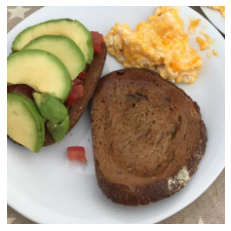

/content/drive/MyDrive/inversecooking/src/modules/multihead_attention.py:128: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/cuda/Indexing.cu:963.)
  float('-inf'),


RECIPE 1

Title: Avocado egg and tomato sandwich

Ingredients:
avocado, tomato, bread, egg, salt, oil, mayonnaise, pepper

Instructions:
-Heat oil in a pan and cook the eggs for about 5 minutes, or until set, but not hard.
-Toast bread and spread avocado on one side of each slice.
-In a small bowl, mix together mayo, salt, and pepper.
-Spread on the other side of the bread.
-Heat the pan, add the avocado, tomato and egg, and toast.
RECIPE 2

Title: Posh egg toast

Ingredients:
avocado, tomato, bread, egg, salt, oil, mayonnaise, pepper

Instructions:
-In a small bowel and mash up egg, add mayonnaise, salt and pepper.
-Add avocado to eggs and mayonnaise mixture and blend together.
-Spread avocado mixture over each slice of bread and then place the slices of tomato and avocado on top.
RECIPE 3

Title: Egg and avocado open-faced sandwiches

Ingredients:
avocado, tomato, bread, egg, salt, oil, mayonnaise, pepper

Instructions:
-Preheat the oven to 325.
-Heat a 9- x 5-inch loaf pan in the ov

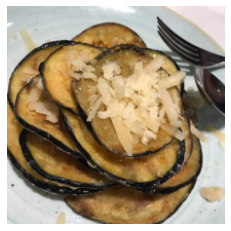

RECIPE 1

Title: Grilled zucchini and squash with summer squash and zucchini

Ingredients:
zucchini, oil, salt, cheese, squash, pepper

Instructions:
-Preheat grill to medium heat.
-Brush squash with olive oil and season with salt and pepper.
-Grill squash, zucchini and summer squash until tender and grill marks appear, about 10 minutes.
-Remove from grill and cut into slices.
-Brush zucchini slices with olive oil and sprinkle with parmesan cheese and pepper.
-Grill until cheese is melted and squash is tender, about 5 minutes per side.
Not a valid recipe!
Reason:  no eos found
RECIPE 2

Title: Farmers' market squash, parmesan & parmesan with summer squash

Ingredients:
zucchini, oil, salt, cheese, squash, pepper

Instructions:
-Preheat oven to 400 f.
-Cut the squash in half and scrape the seeds with a spoon and place them in a small roasting pan with the squash in a single layer.
-Drizzle with olive oil and season with the salt and pepper.
-Roast for approximately 30 minutes, or until 

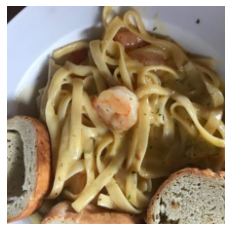

RECIPE 1

Title: Shrimp and garlic alfredo with angel hair pasta

Ingredients:
shrimp, pepper, butter, cheese, oil, clove, pasta, salt

Instructions:
-Bring a large pot of lightly salted water to a boil.
-Add pasta and cook for 8 to 10 minutes or until al dente; drain.
-In a large skillet, melt butter and olive oil over medium heat.
-Add shrimp and garlic and cook until shrimp are pink and tender, about 3 minutes.
-In a large bowl, toss pasta with shrimp mixture and mozzarella cheese.
-Season with salt and pepper to taste.
-Serve immediately.
RECIPE 2

Title: Shrimp and feta angel hair pasta with shrimp and parmesan

Ingredients:
shrimp, pepper, butter, cheese, oil, clove, pasta, salt

Instructions:
-Preheat the oven to 350f.
-Heat a large pot of lightly salted water to a boil.
-Cook tri-colored pasta in the boiling water until done, 5 to 7 minutes; drain.
-While pasta cook, cook shrimp in butter over medium heat until just pink, and drain.
-Toss drained farfalle, farfalle, and shrimp 

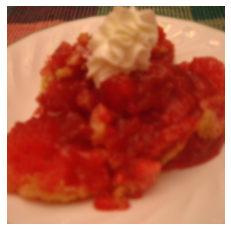

RECIPE 1

Title: Rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb strawberry rhubarb crisp

Ingredients:
sugar, rhubarb, water, flour, strawberries, cinnamon, egg, butter, salt

Instructions:
-For the rhubarb filling, combine rhubarb, strawberries, sugar, water, cinnamon, and salt in a saucepan; bring to a boil.
-Cover and cook for 10 minutes or until rhubarb is tender.
-Combine flour, butter, and egg; stir into rhubarb mixture.
-Transfer to a greased 8-in.
-Square baking dish.
-For the topping, combine sugar and cut in the butter until crumbly.
-Sprinkle over rhubarb mixture.
-Bake at 350 for 45-50 minutes or until topping is goldenand filling is bubbly.
Not a valid recipe!
Reason:  no eos found
Not a valid recipe!
Reason:  Repeated instructions.
RECIPE 2

Title: Strawberry-rhubarb crisp

Ingredients:

In [ ]:
# code below was used to save vocab files so that they can be loaded without Vocabulary class
#ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_ingrs.pkl'), 'rb'))
#ingrs_vocab = [min(w, key=len) if not isinstance(w, str) else w for w in ingrs_vocab.idx2word.values()]
#vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_toks.pkl'), 'rb')).idx2word
#pickle.dump(ingrs_vocab, open('../demo/ingr_vocab.pkl', 'wb'))
#pickle.dump(vocab, open('../demo/instr_vocab.pkl', 'wb'))

ingrs_vocab = pickle.load(open('/content/drive/MyDrive/inversecooking/checkpoints/inversecooking/model/checkpoints/pretrained/ingr_vocab.pkl', 'rb'))
vocab = pickle.load(open( '/content/drive/MyDrive/inversecooking/checkpoints/inversecooking/model/checkpoints/pretrained/instr_vocab.pkl', 'rb'))

ingr_vocab_size = len(ingrs_vocab)
instrs_vocab_size = len(vocab)
output_dim = instrs_vocab_size


import time
t = time.time()
import sys; sys.argv=['']; del sys
args = get_parser()
args.maxseqlen = 15
args.ingrs_only=False
model = get_model(args, ingr_vocab_size, instrs_vocab_size)
# Load the trained model parameters
model_path = '/content/drive/MyDrive/inversecooking/checkpoints/inversecooking/model/checkpoints/pretrained/modelbest.ckpt'
#model_path = '/content/drive/MyDrive/inversecooking/src/ckpt.pt'
model.load_state_dict(torch.load(model_path, map_location=map_loc))
model.to(device)
model.eval()
model.ingrs_only = False
model.recipe_only = False
print ('loaded model')
print ("Elapsed time:", time.time() -t)

transf_list_batch = []
transf_list_batch.append(transforms.ToTensor())
transf_list_batch.append(transforms.Normalize((0.485, 0.456, 0.406), 
                                              (0.229, 0.224, 0.225)))
to_input_transf = transforms.Compose(transf_list_batch)

greedy = [True, False, False, False]
beam = [-1, -1, -1, -1]
temperature = 1.0
numgens = len(greedy)

import requests
from io import BytesIO
import random
from collections import Counter
use_urls = False # set to true to load images from demo_urls instead of those in test_imgs folder
show_anyways = False #if True, it will show the recipe even if it's not valid
image_folder = '/content/drive/MyDrive/inversecooking/data/demo_imgs'

if not use_urls:
    demo_imgs = os.listdir(image_folder)
    random.shuffle(demo_imgs)

demo_urls = ['https://food.fnr.sndimg.com/content/dam/images/food/fullset/2013/12/9/0/FNK_Cheesecake_s4x3.jpg.rend.hgtvcom.826.620.suffix/1387411272847.jpeg',
            'https://www.196flavors.com/wp-content/uploads/2014/10/california-roll-3-FP.jpg']

demo_files = demo_urls if use_urls else demo_imgs


#Actual pretrained model code
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    transf_list = []
    transf_list.append(transforms.Resize(256))
    transf_list.append(transforms.CenterCrop(224))
    transform = transforms.Compose(transf_list)
    
    image_transf = transform(image)
    image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)
    
    plt.imshow(image_transf)
    plt.axis('off')
    plt.show()
    plt.close()
    
    num_valid = 1
    for i in range(numgens):
        with torch.no_grad():
            image_tensor.to('cuda')
            outputs = model.sample(image_tensor, greedy=greedy[i], 
                                   temperature=temperature, beam=beam[i], true_ingrs=None)
            
        ingr_ids = outputs['ingr_ids'].cpu().numpy()
        recipe_ids = outputs['recipe_ids'].cpu().numpy()
        
        outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
        if valid['is_valid'] or show_anyways:
            
            print ('RECIPE', num_valid)
            num_valid+=1
            #print ("greedy:", greedy[i], "beam:", beam[i])
    
            BOLD = '\033[1m'
            END = '\033[0m'
            print (BOLD + '\nTitle:' + END,outs['title'])

            print (BOLD + '\nIngredients:'+ END)
            print (', '.join(outs['ingrs']))

            print (BOLD + '\nInstructions:'+END)
            print ('-'+'\n-'.join(outs['recipe']))

            print ('='*20)

        else:
            print ("Not a valid recipe!")
            print ("Reason: ", valid['reason'])

In [ ]:
!python sample.py --model_name model --save_dir ../checkpoints --recipe1m_dir path_to_dataset --greedy --eval_split test

In [ ]:
import pickle


with open('/content/drive/MyDrive/inversecooking/data/ingr_vocab.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
!pwd

/content/drive/MyDrive/inversecooking/src


In [ ]:
path_to_dataset = "/content/drive/MyDrive/inversecooking/data"
model = "modelbest.ckpt"
os.chdir('/content/drive/MyDrive/inversecooking/src/')
!python sample.py --model_name model --save_dir ../data/checkpoints --recipe1m_dir path_to_dataset --greedy --eval_split test

Eval logs will be saved to: ../data/checkpoints/inversecooking/model/logs/eval.log


In [ ]:
os.chdir("/content/drive/MyDrive/inversecooking/dataset_path/")

In [ ]:
!wget http://data.csail.mit.edu/im2recipe/recipe1M_layers.tar.gz

--2022-04-16 03:37:38--  http://data.csail.mit.edu/im2recipe/recipe1M_layers.tar.gz
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399115593 (381M) [application/octet-stream]
Saving to: ‘recipe1M_layers.tar.gz’

recipe1M_layers.tar 100%[===================>] 380.63M  29.0MB/s    in 16s     

2022-04-16 03:37:55 (23.8 MB/s) - ‘recipe1M_layers.tar.gz’ saved [399115593/399115593]



In [ ]:
!tar -xvf recipe1M_layers.tar.gz

layer1.json
layer2.json


In [ ]:
!pwd

/content


In [ ]:
import json
f = open('layer1.json')
data = json.load(f)
data[0]


{'id': '000018c8a5',
 'ingredients': [{'text': '6 ounces penne'},
  {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
  {'text': '1 ounce Cheddar, grated (1/4 cup)'},
  {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
  {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
  {'text': '1/4 cup (1/2 stick) unsalted butter'},
  {'text': '1/3 cup all-purpose flour'},
  {'text': '3 cups milk'},
  {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
  {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
  {'text': '1/2 teaspoon kosher salt'},
  {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
  {'text': '1/8 teaspoon garlic powder'},
  {'text': '(makes about 4 cups)'}],
 'instructions': [{'text': 'Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.'},
  {'text': 'Cook the penne 2 minutes less than package directions.'},
  {'text': '(It will finish cooking in the oven.)'},
  {'text': 'Rinse the pasta in c

In [ ]:
len(data)

1029720

In [ ]:
data[0]

{'id': '000018c8a5',
 'ingredients': [{'text': '6 ounces penne'},
  {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
  {'text': '1 ounce Cheddar, grated (1/4 cup)'},
  {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
  {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
  {'text': '1/4 cup (1/2 stick) unsalted butter'},
  {'text': '1/3 cup all-purpose flour'},
  {'text': '3 cups milk'},
  {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
  {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
  {'text': '1/2 teaspoon kosher salt'},
  {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
  {'text': '1/8 teaspoon garlic powder'},
  {'text': '(makes about 4 cups)'}],
 'instructions': [{'text': 'Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.'},
  {'text': 'Cook the penne 2 minutes less than package directions.'},
  {'text': '(It will finish cooking in the oven.)'},
  {'text': 'Rinse the pasta in c

In [ ]:
import json
f = open('layer2.json')
data_layer_2 = json.load(f)


FileNotFoundError: ignored

In [ ]:
len(data_layer_2)

402760

In [ ]:
data_layer_2[0]

{'id': '00003a70b1',
 'images': [{'id': '3e233001e2.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picaYYmb9.jpg'},
  {'id': '7f749987f9.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picpy37SW.jpg'},
  {'id': 'aaf6b2dcd3.jpg',
   'url': 'http://img.sndimg.com/food/image/upload/w_512,h_512,c_fit,fl_progressive,q_95/v1/img/recipes/47/91/49/picX9CNE2.jpg'}]}

In [ ]:
ids_l1 = []
for ele in data:
  ids_l1.append(ele["id"])
len(ids_l1)

1029720

In [ ]:
ids_l1

In [ ]:
ids_l2 = []
for ele in data_layer_2:
  ids_l2.append(ele["id"])
len(ids_l2)

402760

In [ ]:
len(set(ids_l1) - set(ids_l2))

626960

In [ ]:
1029720 - 626960

402760

In [ ]:
"3e233001e2" in ids_l1

False

In [ ]:
data_layer1 = data[0:50000]

In [ ]:
len(data_layer1)

50000

In [ ]:
with open("layer1_new.json","w") as f:
  json.dump(data_layer1,f)

NameError: ignored

In [ ]:
import json
f = open('layer1_new.json')
data_layer_1_new = json.load(f)

In [ ]:
len(data_layer_1_new)

50000

In [ ]:
ids_in_l1 = []
for ele in data_layer_1_new:
  ids_in_l1.append(ele["id"])
len(ids_in_l1)

50000

In [ ]:
c = 0
final_imgids_layer_2 = []
for data in data_layer_2:
  if data["id"] in ids_in_l1:
    c+=1
    img_list = data["images"]
    for ele in img_list:
      final_imgids_layer_2.append(ele['id'])
    print (c)
print (c)
print(final_imgids_layer_2)

NameError: ignored

In [ ]:
!tar -xvzf 

In [ ]:
data_layer1 = data[0:50000]

NameError: ignored

In [ ]:
os.chdir("/content/drive/MyDrive/inversecooking/src")

In [ ]:
!python train.py --model_name im2ingr --batch_size 100 --finetune_after 0 --ingrs_only \
--es_metric iou_sample --loss_weight 0 1000.0 1.0 1.0 \
--learning_rate 1e-4 --scale_learning_rate_cnn 1.0 \
--save_dir ../checkpoints --recipe1m_dir /content/drive/MyDrive/inversecooking/dataset_path/subsample/ --load_jpeg

Training logs will be saved to: ../checkpoints/inversecooking/im2ingr/logs/train.log


In [ ]:
os.chdir(root_path)
!fusermount -u /content/drive/MyDrive/inversecooking/dataset_path/images/train_data/